## MC1-Project-1

http://quantsoftware.gatech.edu/MC1-Project-1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from util import get_data, plot_data
%matplotlib inline

In [47]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    return daily_returns[1:]

In [73]:
def compute_portfolio_stats(prices, allocs=[0.1,0.2,0.3,0.4], rfr = 0.0, sf = 252.0):
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    port_vals = alloced.sum(axis = 1)
    daily_rets = compute_daily_returns(port_vals)
    cr = port_vals[-1] / port_vals[0] - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sr = (daily_rets - rfr).mean() / (daily_rets).std() * np.sqrt(sf)
    
    return cr, adr, sddr, sr

In [66]:
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    # Get daily portfolio value
    
    prices_SPY = prices_SPY / prices_SPY[0]    
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    pos_vals = alloced * sv
    port_vals = pos_vals.sum(axis = 1)

    # Get portfolio statistics (note: std_daily_ret = volatility)
    cr, adr, sddr, sr = compute_portfolio_stats(prices, allocs, rfr, sf)

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_vals/sv, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
        plot_data(df_temp)
        pass

    # Add code here to properly compute end value
    ev = sv * (1 + cr)
    return cr, adr, sddr, sr, ev

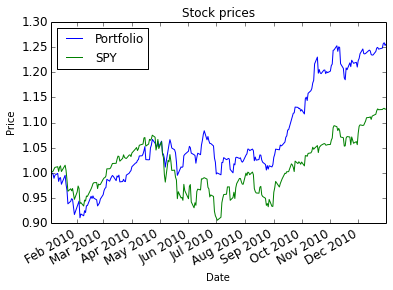

('Start Date: ', datetime.datetime(2010, 1, 1, 0, 0))
('End Date: ', datetime.datetime(2010, 12, 31, 0, 0))
('Symbols:', ['GOOG', 'AAPL', 'GLD', 'XOM'])
('Allocations: ', [0.2, 0.3, 0.4, 0.1])
('Sharpe Ratio: ', 1.5181924364126351)
('Volatility (stdev of daily returns): ', 0.010010402800015385)
('Average Daily Return: ', 0.00095736623423814306)
('Cumulative Return: ', 0.25564678453350442)


In [74]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms =  ['GOOG','AAPL','GLD','XOM']
allocs=[0.2,0.3,0.4,0.1]

cr, adr, sddr, sr, ev = assess_portfolio(sd, ed, syms, allocs, gen_plot=True)
print("Start Date: ", sd)
print("End Date: ", ed)
print("Symbols:", syms)
print("Allocations: ", allocs)
print("Sharpe Ratio: ", sr)
print("Volatility (stdev of daily returns): ", sddr)
print("Average Daily Return: ", adr)
print("Cumulative Return: ", cr)

In [33]:
dates = pd.date_range(sd, ed)
prices_all = get_data(syms, dates)  # automatically adds SPY
prices = prices_all[syms]
normed = prices / prices.ix[0]
alloced = normed * allocs
print(alloced)

                GOOG      AAPL       GLD       XOM
2010-01-04  0.200000  0.300000  0.400000  0.100000
2010-01-05  0.199119  0.300507  0.399636  0.100387
2010-01-06  0.194100  0.295734  0.406230  0.101255
2010-01-07  0.189581  0.295185  0.403716  0.100930
2010-01-08  0.192108  0.297142  0.405719  0.100527
2010-01-11  0.191818  0.294524  0.411111  0.101658
2010-01-12  0.188426  0.291173  0.402514  0.101146
2010-01-13  0.187344  0.295284  0.406339  0.100744
2010-01-14  0.188225  0.293566  0.408124  0.100759
2010-01-15  0.185082  0.288667  0.403862  0.099938
2010-01-19  0.187513  0.301436  0.406266  0.100170
2010-01-20  0.185213  0.296790  0.396867  0.098373
2010-01-21  0.186033  0.291666  0.391148  0.096452
2010-01-22  0.175512  0.277194  0.390419  0.095585
2010-01-25  0.172318  0.284655  0.391548  0.095213
2010-01-26  0.173090  0.288681  0.391840  0.095321
2010-01-27  0.172988  0.291398  0.388087  0.094779
2010-01-28  0.170495  0.279362  0.387905  0.093927
2010-01-29  0.169107  0.269226 